In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('emails.csv')

In [3]:
df.shape

(5172, 3002)

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# input data
x=df.drop(['Email No.','Prediction'],axis=1)

# output
y=df['Prediction']

In [6]:
print(x.shape)
print(y.shape)

(5172, 3000)
(5172,)


In [7]:
set(x.dtypes)

{dtype('int64')}

<Axes: xlabel='Prediction', ylabel='count'>

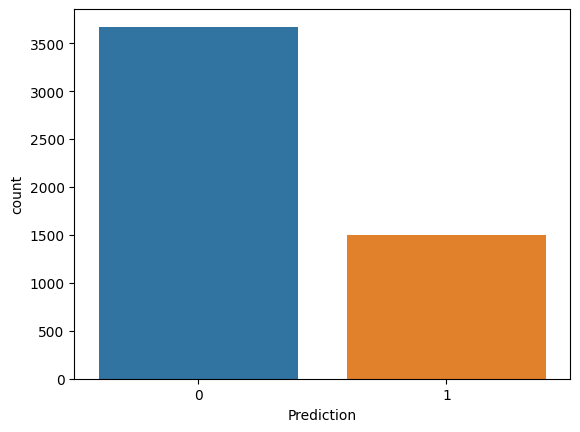

In [8]:
import seaborn as sns
sns.countplot(x=y)

In [9]:
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [10]:
# feature scalling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,test_size=0.3, random_state=42)


In [12]:
print("train ",x_train.shape," test ",x_test.shape ," total",x_scaled.shape)

train  (3620, 3000)  test  (1552, 3000)  total (5172, 3000)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

#create the object 
knn=KNeighborsClassifier(5)

In [14]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [16]:
# import the evaluation
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score

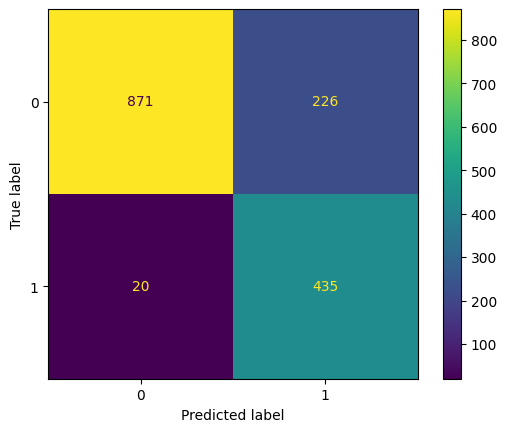

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [18]:
y_test.value_counts()

0    1097
1     455
Name: Prediction, dtype: int64

In [19]:
accuracy_score(y_test,y_pred)

0.8414948453608248

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      1097
           1       0.66      0.96      0.78       455

    accuracy                           0.84      1552
   macro avg       0.82      0.88      0.83      1552
weighted avg       0.88      0.84      0.85      1552



In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
error=[]
for k in range(1,41):
    knn=KNeighborsClassifier(k)
    knn.fit(x_train,y_train)
    ypred=knn.predict(x_test)
    error.append(np.mean(ypred!=y_test))

[0.10115979381443299,
 0.10373711340206186,
 0.1411082474226804,
 0.13015463917525774,
 0.15850515463917525,
 0.14561855670103094,
 0.16817010309278352,
 0.163659793814433,
 0.18363402061855671,
 0.17719072164948454,
 0.20425257731958762,
 0.20038659793814434,
 0.22164948453608246,
 0.21778350515463918,
 0.2338917525773196,
 0.23131443298969073,
 0.24935567010309279,
 0.24420103092783504,
 0.25966494845360827,
 0.25837628865979384,
 0.27448453608247425,
 0.2712628865979381,
 0.29059278350515466,
 0.28801546391752575,
 0.29832474226804123,
 0.29445876288659795,
 0.30541237113402064,
 0.30347938144329895,
 0.3131443298969072,
 0.3086340206185567,
 0.3176546391752577,
 0.31378865979381443,
 0.32216494845360827,
 0.32087628865979384,
 0.3247422680412371,
 0.3234536082474227,
 0.3286082474226804,
 0.327319587628866,
 0.33505154639175255,
 0.3324742268041237]

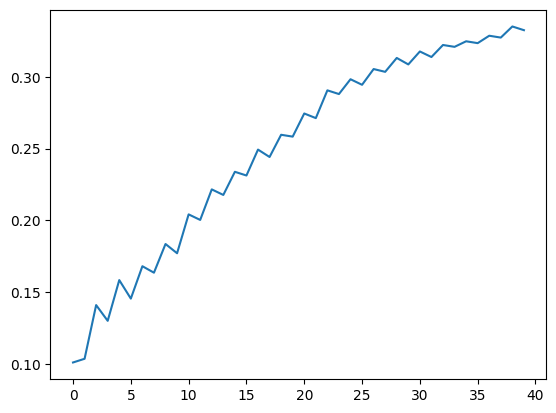

In [23]:
plt.plot(error)
error

In [24]:
knn=KNeighborsClassifier(1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [25]:
print("accuracy_score ",accuracy_score(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))


accuracy_score  0.898840206185567
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1097
           1       0.78      0.91      0.84       455

    accuracy                           0.90      1552
   macro avg       0.87      0.90      0.88      1552
weighted avg       0.91      0.90      0.90      1552



In [26]:
from sklearn.svm import SVC

In [27]:
svm=SVC(kernel="linear")   # linear,rbf(radial base function),poly(polynomial),symgoid

In [28]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [29]:
svc_pred=svm.predict(x_test)

In [30]:
accuracy_score(y_test,svc_pred)

0.967139175257732

In [31]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1097
           1       0.93      0.96      0.95       455

    accuracy                           0.97      1552
   macro avg       0.96      0.97      0.96      1552
weighted avg       0.97      0.97      0.97      1552

